# Introduction to Artificial Neural Network (ANN)

**_NOTE_:** After reading online and recommended by friends. PyTorch seems to be a better lib. The code in the book is tensorflow but I'll try my best to convert it into pyTorch code.

## From Biological to Artificial Neurons

Surprisingly, ANNs have been around for quite a while: they were first introduced back in 1943 by the neurophysiologist Warren McCulloch and the mathematician Walter Pitts. In their landmark paper,2 “[A Logical Calculus of Ideas Immanent in Nervous Activity](https://scholar.google.com/scholar?q=A+Logical+Calculus+of+Ideas+Immanent+in+Nervous+Activity+author%3Amcculloch),” McCulloch and Pitts presented a simplified computational model of how biological neurons might work together in animal brains to perform complex computations using propositional logic. This was the first artificial neural network architecture. 

### Biological Neural

A biological neuron, primarily found in animal brains, consists of a cell body with a nucleus, branching extensions called dendrites, and a long extension called the axon. The axon's length can vary greatly and ends in branches called telodendria, which have synaptic terminals at their tips. These terminals connect to the dendrites or cell bodies of other neurons. Neurons receive electrical impulses (signals) via synapses. When enough signals are received within a short time, the neuron fires its own signals.

![Biological Neuron](<./img/chapter 10/Screenshot 2024-06-07 at 5.46.05 PM.jpg>)

### The Perceptron
The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (see Figure 10-4) called a _threshold logic unit (TLU)_ , or sometimes a linear threshold unit (LTU): the inputs and output are now numbers (instead of binary on/off values) and each input con‐ nection is associated with a weight. The TLU computes a weighted sum of its inputs ($z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^T w$), then applies a step function to that sum and outputs the result: $h_{w}(\mathbf{x}) = \text{step}(z), \text{where} \; \mathbf{z} = \mathbf{x}^T \mathbf{w}$.

![Threshold Logic Unit](<./img/chapter 10/Screenshot 2024-06-07 at 5.50.52 PM.jpg>)

The most common step function used in Perceptrons is the Heaviside step function

$$
\text{Equation 10.1 : Common Step Functions used in Perceptron} \\ \\ 

\text{heaviside}(z) = 
\begin{cases} 
0 & \text{if } z < 0 \\
1 & \text{if } z \geq 0 
\end{cases}
$$

$$
\text{sgn}(z) = 
\begin{cases} 
-1 & \text{if } z < 0 \\
0 & \text{if } z = 0 \\
+1 & \text{if } z > 0 
\end{cases}
$$

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), it is called a fully connected layer or a dense layer. 

In 1949, Donald Hebb suggested that when a biological neuron frequently triggers another neuron, the connection between them strengthens. This concept, summarized by Siegrid Löwel as "Cells that fire together, wire together," is known as Hebb's rule (or Hebbian learning). According to this rule, the connection weight between two neurons increases when they have the same output.

Perceptrons are trained using a variant of this rule that considers the network's error, reinforcing connections that reduce the error. Specifically, the Perceptron processes one training instance at a time and makes predictions. For every output neuron that makes an incorrect prediction, it reinforces the connection weights from the inputs that would have led to the correct prediction.

$$
w_{i,j}^{(\text{next step})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$$

- $ w_{i,j} $ is the connection weight between the $ i $-th input neuron and the $ j $-th output neuron.
- $ x_i $ is the $ i $-th input value of the current training instance.
- $ \hat{y}_j $ is the output of the $ j $-th output neuron for the current training instance.
- $ y_j $ is the target output of the $ j $-th output neuron for the current training instance.
- $ \eta $ is the learning rate.

## Multi Layer Perceptron and Back Propagation

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer (see Figure 10-7). The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

![Multi-Layer Perceptron](<./img/chapter 10/Screenshot 2024-06-07 at 6.17.40 PM.jpg>)

When an artificial neural network (ANN) has many hidden layers, it is called a deep neural network (DNN). Deep Learning is the study of DNNs and models with deep stacks of computations. However, many people refer to Deep Learning whenever neural networks are mentioned, even if they are shallow.

But in 1986, David Rumelhart, Geoffrey Hinton and Ronald Williams published a [groundbreaking paper](https://scholar.google.com/scholar?q=Learning+Internal+Representations+by+Error+Propagation+author%3Arumelhart) introducing the backpropagation training algorithm, which is still used today. In short, it is simply Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regards to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.



$$
\begin{align*}
\text{Equation : Computing the } & \text{outputs of a fully connected layer.} \\ 
h_{W,b}(\mathbf{X}) & = \phi(\mathbf{XW} + \mathbf{b}) 
\end{align*}
$$

- **Input Matrix ($\mathbf{X}$)**: Represents the matrix of input features. Each row corresponds to an instance, and each column corresponds to a feature.
- **Weight Matrix ($\mathbf{W}$)**: Contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artificial neuron in the layer.
- **Bias Vector ($\mathbf{b}$)**: Contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.
- **Activation Function ($\phi$)**: Called the activation function. When the artificial neurons are Threshold Logic Units (TLUs), it is a step function. Other activation functions will be discussed shortly.

For each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error con‐ tribution from each connection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

[another resource
](https://www.youtube.com/watch?v=SmZmBKc7Lrs)

### Context and Problem

In machine learning, especially in neural networks, an activation function is used to introduce non-linearity into the model. This non-linearity is crucial because it allows the network to learn and model more complex patterns in the data.

### Original Setup

Initially, the Multilayer Perceptron (MLP) architecture used a step function as the activation function. The step function is binary—it outputs one value if the input is above a certain threshold and another value if it's below.

### Issue with the Step Function

The problem with the step function is that it only outputs flat segments (either 0 or 1). This creates a significant issue during training with Gradient Descent, a common optimization algorithm. Gradient Descent relies on gradients (derivatives) to update the model's parameters. However, the step function doesn't have a gradient (its derivative is zero everywhere except at the threshold), meaning Gradient Descent can't effectively update the weights, as it has no slope to follow.

### Solution: Logistic Function

To address this, the authors replaced the step function with the logistic function, also known as the sigmoid function. The logistic function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The logistic function has a smooth, S-shaped curve that outputs values between 0 and 1. Unlike the step function, the logistic function has a well-defined, non-zero derivative everywhere. This smooth gradient allows Gradient Descent to make progress at every step, enabling the model to learn more effectively.

### Importance of Non-zero Derivative

The logistic function’s non-zero derivative means that small changes in the input (weights) produce small changes in the output, which is crucial for the Gradient Descent algorithm to find the minimum of the loss function. This enables the neural network to adjust its weights in small increments, improving its accuracy over time.

### Broader Implications

This improvement isn’t limited to just the logistic function. The backpropagation algorithm, which is used to train neural networks, works well with many other activation functions that have non-zero derivatives. These include:

- **Tanh (Hyperbolic Tangent)**: Similar to the logistic function but outputs values between -1 and 1, which tends to make each layer’s output more or less centered around 0 at the beginning of training. This often helps speed up convergence. $$\begin{align*} tanh(z) = 2\sigma(2z) -1 \end{align*}$$ 
- **ReLU (Rectified Linear Unit)**: It is continuous but unfortunately not differentiable at z = 0 (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is 0 for z < 0. Outputs the input directly if it’s positive; otherwise, it outputs zero. It has become very popular due to its simplicity and effectiveness. $$\begin{align*} ReLU(z) = max(0,z) \end{align*}$$

These popular activation functions and their derivatives are represented in Figure 10-8. 

![Activation Functions and their Derivatives](<./img/chapter 10/Screenshot 2024-06-09 at 4.35.43 PM.jpg>)


## Regression MLPs

Multilayer Perceptrons (MLPs) can be effectively used for regression tasks, predicting continuous values such as house prices with a single output neuron. For predicting multiple values, like the 2D coordinates of an object's center, multiple output neurons are used, with one neuron per value. For instance, predicting both the coordinates and the bounding box of an object requires four output neurons. Generally, no activation function is used for output neurons in regression, allowing any range of values. However, if outputs need to be positive, the ReLU or softplus functions can be used, and for outputs within a specific range, the logistic or hyperbolic tangent functions are suitable. The mean squared error (MSE) is the typical loss function for training, but for datasets with many outliers, mean absolute error (MAE) or the Huber loss, which combines MSE and MAE, may be preferred.


| Hyperparameter            | Typical Value                                                                         |
|:---------------------------|---------------------------------------------------------------------------------------|
| \# input neurons           | One per input feature (e.g., $28 \times 28 = 784$ for MNIST)                                 |
| \# hidden layers           | Depends on the problem. Typically 1 to 5.                                             |
| \# neurons per hidden layer| Depends on the problem. Typically 10 to 100.                                          |
| \# output neurons          | 1 per prediction dimension                                                           |
| Hidden activation         | ReLU (or SELU)                                                        |
| Output activation         | None or ReLU/Softplus (if positive outputs) or Logistic/Tanh (if bounded outputs)    |
| Loss function             | MSE or MAE/Huber (if outliers)                                                       |

## Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probabil‐ ity of the positive class.

Multilayer Perceptrons (MLPs) are well-suited for handling multilabel binary classification tasks. For instance, in an email classification system, an MLP can predict both whether an email is spam or ham and whether it is urgent or non-urgent. This requires two output neurons, each using the logistic activation function. The first neuron outputs the probability that the email is spam, and the second outputs the probability that it is urgent. Each positive class (spam, urgent) gets a dedicated output neuron. The output probabilities do not need to sum to one, allowing for various combinations of labels such as non-urgent ham, urgent ham, non-urgent spam, and urgent spam.

If each instance can belong only to a single class, out of 3 or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer (see Figure 10-9). The softmax function (introduced in Chapter 4) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to one (which is required if the classes are exclusive). This is called multiclass clas‐ sification.

![A Modern MLP (including ReLU and softmax) ](<./img/chapter 10/Screenshot 2024-06-09 at 5.51.55 PM.jpg>)

Regarding the loss function, since we are predicting probability distributions, the cross-entropy (also called the log loss, see Chapter 4) is generally a good choice.

Table 10-2 : Typical Classification MLP Archtecture

| Hyperparameter              | Binary Classification      | Multilabel Binary Classification | Multiclass Classification      |
|-----------------------------|----------------------------|----------------------------------|-------------------------------|
| Input and hidden layers     | Same as regression         | Same as regression               | Same as regression            |
| # output neurons            | 1                          | 1 per label                      | 1 per class                   |
| Output layer activation     | Logistic                   | Logistic                         | Softmax                       |
| Loss function               | Cross-Entropy              | Cross-Entropy                    | Cross-Entropy                 |

In [2]:
# import libs
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [3]:
# Define a transformer to normlize this data
# Convert the input to tensors and noramlize it

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

### What is Normalization and Why is It Helpful?
Normalizing a set of data transforms the set of data to be on a similar scale. For machine learning models, our goal is usually to recenter and rescale our data such that is between 0 and 1 or -1 and 1, depending on the data itself. One common way to accomplish this is to calculate the mean and the standard deviation on the set of data and transform each sample by subtracting the mean and dividing by the standard deviation, which is good if we assume that the data follows a normal distribution as this method helps us standardize the data and achieve a standard normal distribution.

Normalization can help training of our neural networks as the different features are on a similar scale, which helps to stabilize the gradient descent step, allowing us to use larger learning rates or help models converge faster for a given learning rate.



In [4]:
# Download the data and load the dataset
# In my case the datasets are already downloaded so download=False
training_data = datasets.FashionMNIST(
    "./datasets/FashionMNIST", train=True, download=False, transform=transform
)

testing_data = datasets.FashionMNIST(
    "./datasets/FashionMNIST", train=False, download=False, transform=transform
)


# index_to_class = {i:s for i,s in enumerate(training_data.classes)}
training_data.data.shape, testing_data.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [5]:
(
    (training_data.data.dtype, training_data.data.shape),
    (testing_data.data.dtype, testing_data.data.shape),
)

((torch.uint8, torch.Size([60000, 28, 28])),
 (torch.uint8, torch.Size([10000, 28, 28])))

In [6]:
# Split the datasets for training and validation
train_size = 55000  # int(0.8 * len(training_data))
validation_size = 5000  # int(0.2 * len(training_data))

train_dataset, validation_dataset = random_split(
    training_data, lengths=[train_size, validation_size]
)

In [7]:
# Creating dataloaders
batch_size = 64

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4,
    pin_memory=True,
    prefetch_factor=2,
)  # num_workers for efficient utilize CPU cores and  Memory
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing_data, batch_size=batch_size, shuffle=False)

train_loader, val_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x112ba50a0>,
 <torch.utils.data.dataloader.DataLoader at 0x112b8bdd0>)

In [8]:
classes_name = training_data.classes
classes_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
# Setting devices for MPS support, incase of the M1 macbook. This may differ depending upon the computer
device = (
    torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
)
device

device(type='mps')

In [10]:
import torch.nn as nn
import torch.nn.functional as F
    
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [11]:
# For Summarizing models for Pytorch
from collections import OrderedDict

def model_summary(model, input_size):
    def register_hook(module):
        def hook(module, input, output):
            class_name = str(module.__class__).split(".")[-1].split("'")[0]
            module_idx = len(summary)
            m_key = "%s-%i" % (class_name, module_idx + 1)
            summary[m_key] = OrderedDict()
            summary[m_key]["input_shape"] = list(input[0].size())
            summary[m_key]["input_shape"][0] = batch_size
            if isinstance(output, (list, tuple)):
                summary[m_key]["output_shape"] = [
                    [-1] + list(o.size())[1:] for o in output
                ]
            else:
                summary[m_key]["output_shape"] = list(output.size())
                summary[m_key]["output_shape"][0] = batch_size
            params = 0
            if hasattr(module, "weight") and hasattr(module.weight, "size"):
                params += torch.prod(torch.LongTensor(list(module.weight.size())))
                summary[m_key]["trainable"] = module.weight.requires_grad
            if hasattr(module, "bias") and hasattr(module.bias, "size"):
                params += torch.prod(torch.LongTensor(list(module.bias.size())))
            summary[m_key]["nb_params"] = params

        if (
            not isinstance(module, nn.Sequential)
            and not isinstance(module, nn.ModuleList)
            and not (module == model)
        ):
            hooks.append(module.register_forward_hook(hook))

    device = (
        torch.device("mps")
        if torch.backends.mps.is_available()
        else torch.device("cpu")
    )
    model.to(device)

    summary = OrderedDict()
    hooks = []
    model.apply(register_hook)

    x = torch.zeros((1, *input_size)).to(device)
    model(x)

    for h in hooks:
        h.remove()

    print("----------------------------------------------------------------")
    print("{:>20}  {:>25} {:>15}".format("Layer (type)", "Output Shape", "Param #"))
    print("================================================================")
    total_params = 0
    total_output = 0
    trainable_params = 0
    for layer in summary:
        line_new = "{:>20}  {:>25} {:>15}".format(
            layer,
            str(summary[layer]["output_shape"]),
            "{0:,}".format(summary[layer]["nb_params"]),
        )
        total_params += summary[layer]["nb_params"]
        total_output += torch.prod(torch.LongTensor(summary[layer]["output_shape"]))
        if "trainable" in summary[layer]:
            if summary[layer]["trainable"]:
                trainable_params += summary[layer]["nb_params"]
        print(line_new)

    total_input_size = abs(torch.prod(torch.LongTensor(input_size)) * batch_size)
    total_output_size = abs(total_output * 4.0)  # x4 for float32
    total_params_size = abs(total_params * 4.0)  # x4 for float32
    total_size = total_params_size + total_output_size + total_input_size

    print("================================================================")
    print("Total params: {0:,}".format(total_params))
    print("Trainable params: {0:,}".format(trainable_params))
    print("Non-trainable params: {0:,}".format(total_params - trainable_params))
    print("----------------------------------------------------------------")
    print("Input size (MB): %0.2f" % (total_input_size / (1024**2.0)))
    print("Forward/backward pass size (MB): %0.2f" % (total_output_size / (1024**2.0)))
    print("Params size (MB): %0.2f" % (total_params_size / (1024**2.0)))
    print("Estimated Total Size (MB): %0.2f" % (total_size / (1024**2.0)))
    print("----------------------------------------------------------------")



### Explanation for the code line by line

1. FashionMNISTModel is a subclass of nn.Module, which is the base class for all neural network modules in PyTorch.
2. This is a sequential model. It is  just composed of a single stack of layers, connected sequentially.
3. Suppose you have a batch of images with the shape [batch_size, channels, height, width] (e.g., [64, 1, 28, 28] for a batch of 64 grayscale 28x28 images). After applying nn.Flatten(), the shape becomes [batch_size,  channels * height * width] (e.g., [64, 784] for the previous example). This transformation flattens each image into a vector of size 784 while preserving the batch dimension. 
4. Next we add a hidden layer with 300 neurons. It will use the ReLU activa‐ tion function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
5. Next we add a second hidden layer with 100 neurons, also using the ReLU activation function.
6. Finally, we add a output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

In [12]:
# Making a FashionMNISTModel object and running it on the MPS.
model = FashionMNISTModel().to(device=device)

# Print the model summary
model_summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [64, 784]               0
            Linear-2                  [64, 300]         235,500
            Linear-3                  [64, 100]          30,100
            Linear-4                   [64, 10]           1,010
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.29
Params size (MB): 1.02
Estimated Total Size (MB): 1.36
----------------------------------------------------------------


In [13]:
for name, module in model.named_modules():
    print(f"Layer Name: {name}, Layer Type: {module.__class__.__name__}")

Layer Name: , Layer Type: FashionMNISTModel
Layer Name: flatten, Layer Type: Flatten
Layer Name: fc1, Layer Type: Linear
Layer Name: fc2, Layer Type: Linear
Layer Name: fc3, Layer Type: Linear


In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [15]:
num_epochs = 50

for epoch in range(num_epochs):
    # Model is set to training mode
    model.train()
    
    # Initializes new values at each epoch
    running_loss= 0.0
    correct, total = 0,0
    
    
    # Batch Loop
    for data, target in train_loader:
        
        data, target = data.to(device), target.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(data)
        loss = loss_fn(outputs, target) # This is calculating the loss from the outputs from the forward pass and the real output in the data set
        
        # Backward pass and optimization
        loss.backward() # Calculate the gardient of the loss with respect to model parameter
        optimizer.step() # Updates the model parameters using the gradients computed during the backward pass   
        
        
        # Accumulates the loss for the current batch
        running_loss += loss.item() * data.size(0)
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
    
    
    epoch_loss = running_loss / len(train_loader.dataset) # Epoch loss calculates the average loss over the dataset
    accuracy = 100 * correct / total # accuracy is the % accuracy of the model.
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%')

print("Training complete")

Epoch [1/50], Loss: 2.1600, Accuracy: 31.74%
Epoch [2/50], Loss: 1.6604, Accuracy: 52.23%
Epoch [3/50], Loss: 1.1916, Accuracy: 66.70%
Epoch [4/50], Loss: 0.9493, Accuracy: 71.42%
Epoch [5/50], Loss: 0.8215, Accuracy: 73.18%
Epoch [6/50], Loss: 0.7479, Accuracy: 74.11%
Epoch [7/50], Loss: 0.7013, Accuracy: 74.98%
Epoch [8/50], Loss: 0.6687, Accuracy: 75.76%
Epoch [9/50], Loss: 0.6438, Accuracy: 76.61%
Epoch [10/50], Loss: 0.6233, Accuracy: 77.19%
Epoch [11/50], Loss: 0.6060, Accuracy: 77.88%
Epoch [12/50], Loss: 0.5908, Accuracy: 78.58%
Epoch [13/50], Loss: 0.5773, Accuracy: 79.08%
Epoch [14/50], Loss: 0.5648, Accuracy: 79.60%
Epoch [15/50], Loss: 0.5536, Accuracy: 80.05%
Epoch [16/50], Loss: 0.5434, Accuracy: 80.49%
Epoch [17/50], Loss: 0.5342, Accuracy: 80.89%
Epoch [18/50], Loss: 0.5257, Accuracy: 81.23%
Epoch [19/50], Loss: 0.5181, Accuracy: 81.59%
Epoch [20/50], Loss: 0.5109, Accuracy: 81.84%
Epoch [21/50], Loss: 0.5044, Accuracy: 82.12%
Epoch [22/50], Loss: 0.4985, Accuracy: 82.3

### Explation of the code 


1. Setting the number of the times the entire dataset will pass through the network  
2. Training the Model. The model.train() call sets the model to training mode, enabling features like dropout and batch normalization.
3. Initialize each varibable to track loss and accuracy
4. Batch Loop : Iterates through batches of data. train_loader provides batches of images and their corresponding labels. Each batch is moved to the appropriate device (CPU or MPS).
5. Zero Gradients 
6. Performing a forward pass and calculate the loss. The funtion uses CrossEntropyLoss which is a combination of LogSoftmax and NLLLoss
7. Perform back propagation and update the model parameters using the gradients calculated.
8. Track the loss over the batch.
9. Calculate accuracy of the model.

In [16]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    # Testing the model of validation data
    for data, target in val_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 85.34%


The accuracy of the model turns out to be $85.74\%$. 


If there is a accuracy delta between training dataset and the validation dataset , it is a sign that the model is overfitting over the training data. Overfitting occurs when a model learns the training data too well, including the noise and details that do not generalize to new data. This typically results in excellent performance on the training data but poor performance on unseen data.

In [17]:
# Testing phase
model.eval()  # Set model to evaluation mode
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        loss = loss_fn(outputs, target)
        test_loss += loss.item() * data.size(0)
        _, predicted = torch.max(outputs, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 0.4524, Test Accuracy: 83.99%


## Building a Regression MLP 

We will be using the California Housing dataset. 

Credits to this resource  : [Building a Regression Model for California Housing Dataset using MyTorch](https://machinelearningmastery.com/building-a-regression-model-in-pytorch/)

In [18]:
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Fetching the dataset
data = fetch_california_housing()
X,y = data.data, data.target

In [19]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)



In [20]:
from sklearn.preprocessing import StandardScaler

# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [21]:
# Setting up the training datasets
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test= torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [22]:
 # Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [23]:
# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

In [24]:
# Setting up the loss function and the optimizer

loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [25]:
import tqdm
import numpy as np
import copy
import matplotlib.pyplot as plt

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []


# training Loop
for epoch in range(n_epochs):
    # set the model on training mode
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch : [{epoch}/{n_epochs}]")
        for start in bar:
            # Take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            
            # forward pass
            y_pred = model(X_batch) 
            loss = loss_fn(y_pred, y_batch)
            
            #backward pass
            optimizer.zero_grad()
            loss.backward()
            
            #update Weights
            optimizer.step()
            
            #print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights) 
    
 # restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))


MSE: 0.30
RMSE: 0.55


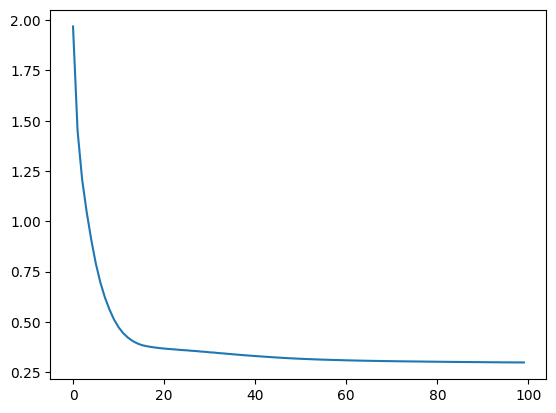

In [26]:
# Plotting the graph
plt.plot(history)
plt.show()   

[Non Linear Regression 1D CNN on California Housing Data](https://github.com/shreya0202/Non-Linear-Regression-1D-CNN-on-California-Housing-Data/blob/master/NLP_Assignment1.ipynb)